In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# raw_df has the data in 2 rows for each real row of data
# the first of the 2 rows contains all data needed for 11 columns
# the second of the 2 rows only contains needed data for 3 columns
# hstack takes these two buckets of data and combines then horizontally into 1 long row of columns
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]
df = pd.DataFrame(data, columns=feature_names)

In [2]:
raw_df

0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN  
4     17.8  
...    ...  
1007   NaN  
1008  21.0  
1009   NaN  
1010  21.0  
1011   NaN  

[1012 rows x 11 columns]

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
df.shape

(506, 14)

In [5]:
bos_X = df.drop(["MEDV"], axis=1)
bos_y = df["MEDV"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [7]:
# split the data
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [19]:
# take the original box_X dataset and scale the data with mean 0 and std 1 for each column
bos_sX = StandardScaler().fit_transform(bos_X)

In [20]:
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

In [21]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

# originial data linear regression model
lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)

LinearRegression()

In [23]:
lr.score(bos_X_test, bos_y_test)

0.7112260057484938

In [24]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [25]:
lr.intercept_

31.6310840356937

In [26]:
# scaled linear regression model
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression()

In [27]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484927

In [28]:
lr2.intercept_

22.50945471291038

In [29]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

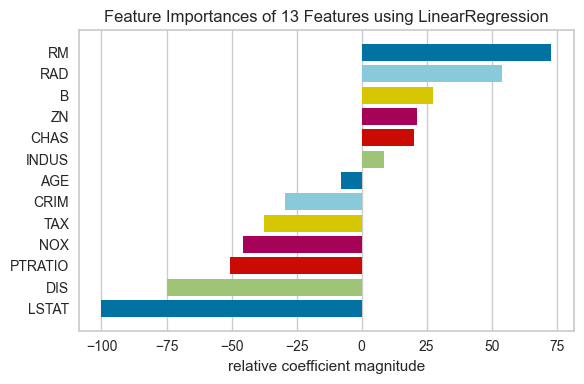

<Axes: title={'center': 'Feature Importances of 13 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [30]:
# visualize
import matplotlib.pyplot as plt
from yellowbrick.model_selection.importances import FeatureImportances

fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(lr2, labels=bos_X.columns)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()

### SVMs

In [31]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(bos_sX_train, bos_sy_train)

SVR()

In [32]:
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487939

### K-Nearest Neighbor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knr= KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)


KNeighborsRegressor()

In [34]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

### Decision Tree

# DOCUMENT THIS ONE
# ALSO LOOK IN PRIOR CHAPTERS TO CREATE BROKEN REPORTS LIKE THESE BELOW

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
dtr.score(bos_X_test, bos_y_test)

0.8444833592340152

In [37]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
    dtr,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled = True)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(g.create_png())

In [46]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


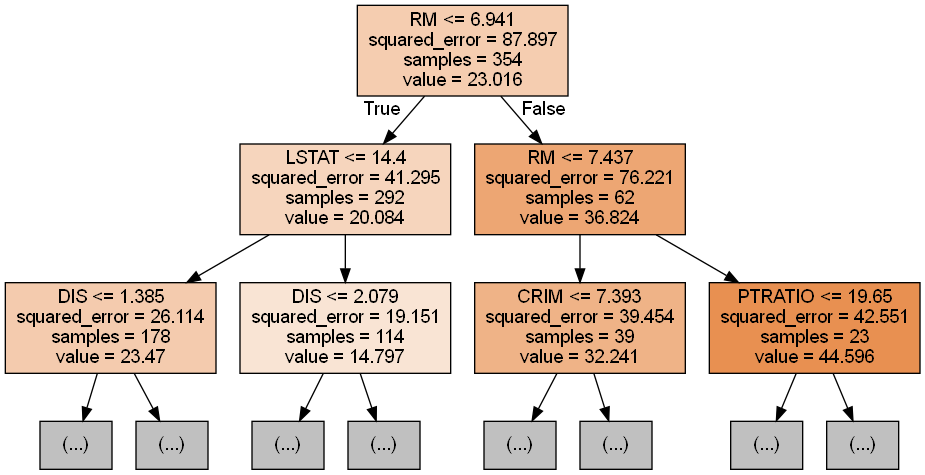

In [42]:
dot_data=StringIO()
export_graphviz(
    dtr,
    max_depth=2,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True)
    
g = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(g.create_png())

In [57]:
#pip install dtreeviz

C:\Users\timry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


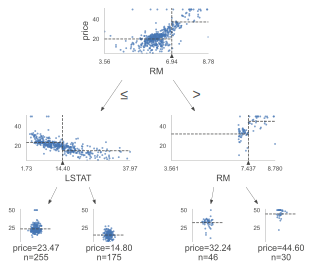

In [80]:
from dtreeviz import model

dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(bos_X_train, bos_y_train)
viz = dtreeviz.model(
    dtr3,
    bos_X,
    bos_y,
    target_name="price",
    feature_names=bos_X.columns)
viz.view()

In [82]:
#feature importance
for col, val in sorted(
    zip(bos_X.columns, dtr.feature_importances_),
    key = lambda x: x[1],
    reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")


RM             0.576
LSTAT          0.190
DIS            0.110
CRIM           0.058
PTRATIO        0.025


### Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(random_state=42)

In [86]:
rfr.score(bos_X_test, bos_y_test)

0.8708997131330258

In [88]:
#feature importance
for col, val in sorted(
    zip(bos_X.columns, rfr.feature_importances_),
    key = lambda x: x[1],
    reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.440
LSTAT          0.380
DIS            0.066
CRIM           0.032
PTRATIO        0.019


### XGBoost Regression

In [94]:
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
xgr.score(bos_X_test, bos_y_test)

0.8729544676981909

In [99]:
xgr.predict(bos_X.iloc[[0]])

array([26.637667], dtype=float32)

In [100]:
#feature importance
for col, val in sorted(
    zip(bos_X.columns, xgr.feature_importances_),
    key = lambda x: x[1],
    reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.403
RM             0.307
DIS            0.087
PTRATIO        0.068
TAX            0.029


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

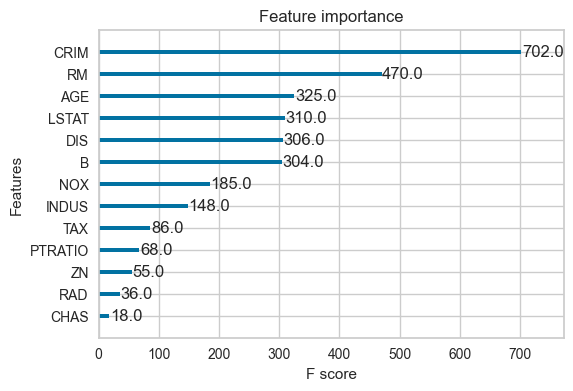

In [106]:
fig, ax = plt.subplots(figsize=(6,4))
xgb.plot_importance(xgr, ax=ax)

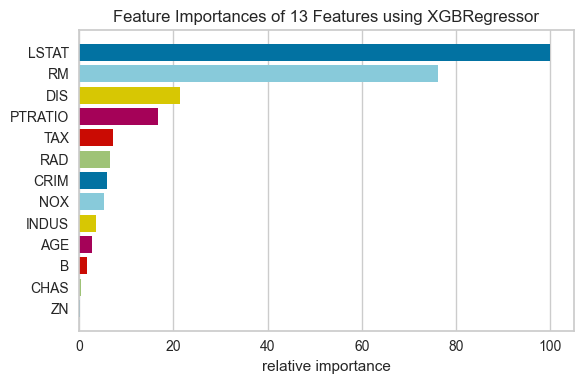

<Axes: title={'center': 'Feature Importances of 13 Features using XGBRegressor'}, xlabel='relative importance'>

In [104]:
fig, ax = plt.subplots(figsize=(6,4))
fi_viz= FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
fi_viz.poof()

In [107]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[RM<6.94299984] yes=1,no=2,missing=2
	1:[LSTAT<14.4300003] yes=3,no=4,missing=4
		3:[DIS<1.38610005] yes=7,no=8,missing=8
			7:[CRIM<8.49213028] yes=15,no=16,missing=16
				15:leaf=6.07144117
				16:leaf=0.732627034
			8:[RM<6.54899979] yes=17,no=18,missing=18
				17:[LSTAT<7.78999996] yes=25,no=26,missing=26
					25:[LSTAT<5.63999987] yes=35,no=36,missing=36
						35:leaf=0.787097394
						36:leaf=0.0659914389
					26:[RM<6.10099983] yes=37,no=38,missing=38
						37:leaf=-0.759166777
						38:leaf=-0.301650971
				18:[LSTAT<7.01000023] yes=27,no=28,missing=28
					27:[PTRATIO<17.8999996] yes=39,no=40,missing=40
						39:leaf=2.06367588
						40:leaf=0.838728786
					28:[DIS<3.4217] yes=41,no=42,missing=42
						41:leaf=1.1530751
						42:leaf=0.18386735
		4:[DIS<2.07879996] yes=9,no=10,missing=10
			9:[CRIM<6.39311981] yes=19,no=20,missing=20
				19:[AGE<88.5] yes=29,no=30,missing=30
					29:leaf=-0.242373005
					30:leaf=-2.37043929
				20:leaf=-3.59292293
			10:[B<316.029999] yes=

<Axes: >

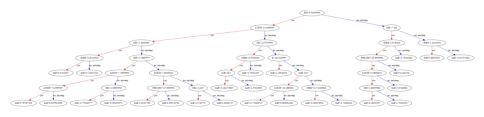

In [108]:
fig, ax = plt.subplots(figsize=(6,4))
xgb.plot_tree(xgr, ax=ax, num_trees=0)

### LightGBM Regression

In [111]:
#pip install lightgbm

In [117]:
import warnings
warnings.filterwarnings("ignore")

from lightgbm import LGBMRegressor
lgr = LGBMRegressor(random_state=42)
lgr.fit(bos_X_train, bos_y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 13
[LightGBM] [Info] Start training from score 23.015819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(random_state=42)

In [118]:
lgr.score(bos_X_test, bos_y_test)

0.847729219534575

In [119]:
lgr.predict(bos_X.iloc[[0]])

array([30.31689569])

In [120]:
#feature importance
for col, val in sorted(
    zip(bos_X.columns, lgr.feature_importances_),
    key = lambda x: x[1],
    reverse = True)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

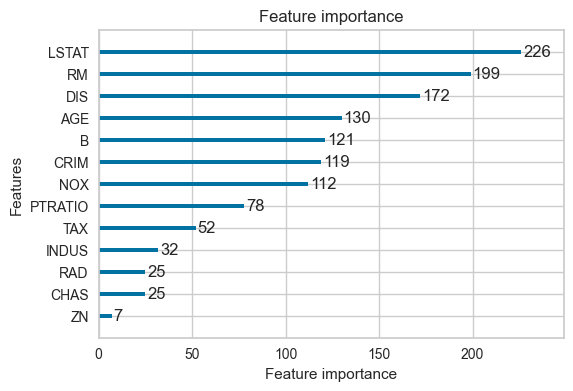

In [123]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(6,4))
plot_importance(lgr, ax=ax)

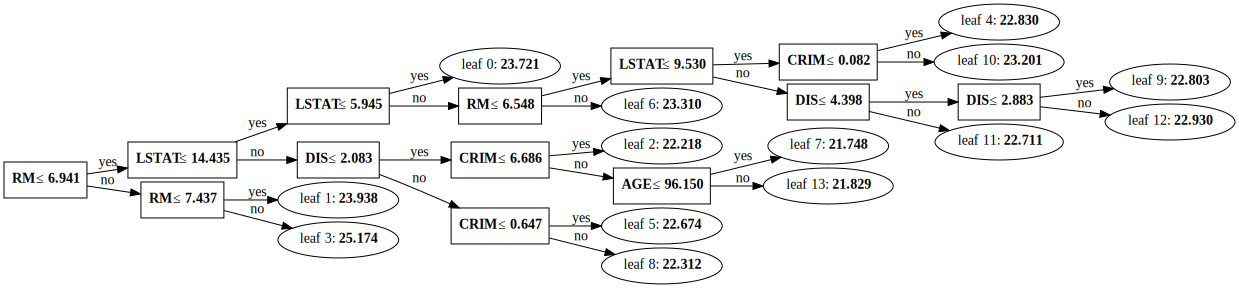

In [124]:
from lightgbm import create_tree_digraph
create_tree_digraph(lgr)